# Graded Challenge 1 (Regression)
---
## Introduction

**Nama : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**

---




Data diambil dari situs kaggle (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Tugas ini meruppakan bagian dari Phase 1 yang bertujuan untuk mengimplementasikan Linear Regression dalam Machine Learning.

## Import Library

Melakukan import pustaka yang dibutuhkan dalam proses analisis dataset.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score


## Data Loading
Melakukan loading data yang akan digunakan.

---


In [2]:
data = pd.read_csv('rideshare_kaggle.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'rideshare_kaggle.csv'

Data terdiri dari 693071 baris dan 57 column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dataset terdiri dari 3 jenis tipe data yaitu: float, integer, dab string

In [ ]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat nilai null dari kolom `price` sebanyak 55095

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [ ]:
data.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

## Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(693071, 57)

In [ ]:
data.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

**Perbandingan Total Trip Uber & Lyft**

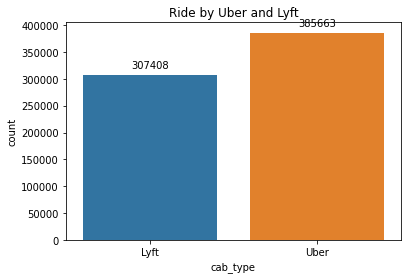

In [ ]:
plt.title('Ride by Uber and Lyft')

fig = sns.countplot(x=data['cab_type'])

for p in fig.patches:
  fig.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Seperti yang bisa dilihat, Uber memiliki total perjalanan yang sedikit lebih banyak daripada Lyft. Uber memiliki 330.568 perjalanan dan Lyft memiliki 307.408 perjalanan

**Jumlah perjalanan uber dan lyft menurut jenis layanan**

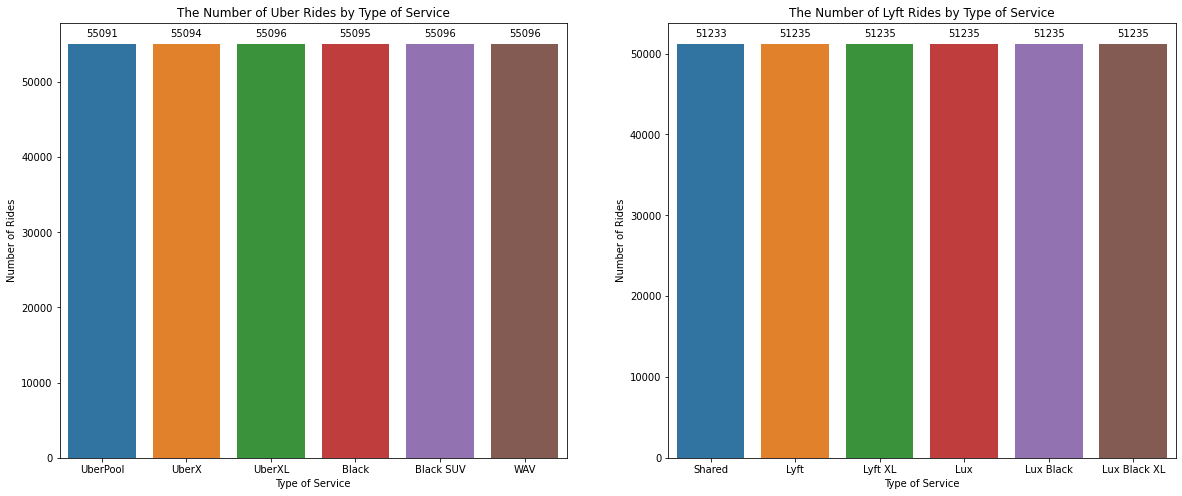

In [ ]:
# The Average price of rides by type of service

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']

fig, ax = plt.subplots(1,2, figsize = (20,8))

ax1 = sns.barplot(x = data[data['cab_type'] == 'Uber'].groupby('name').name.count().index, y = data[data['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[0] ,order = uber_order)
ax2 = sns.barplot(x = data[data['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = data[data['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1],order = lyft_order)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax1.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax2.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Number of Uber Rides by Type of Service')
ax2.set_title('The Number of Lyft Rides by Type of Service')

plt.show()

Dari grafik tersebut, pengguna Uber dan Lyft cenderung menggunakan semua jenis layanan yang ditawarkan oleh kedua perusahaan. Jumlah perjalanan oleh semua layanan memiliki jumlah yang hampir sama.

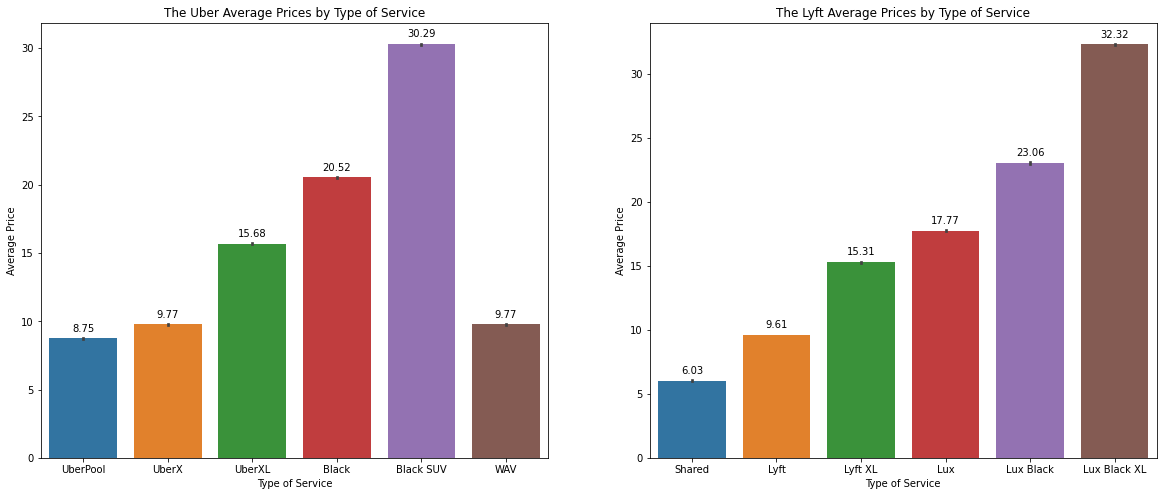

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,8))

ax1 = sns.barplot(x = data[data['cab_type'] == 'Uber'].name, y = data[data['cab_type'] == 'Uber'].price , ax = ax[0], order = uber_order)
ax2 = sns.barplot(x = data[data['cab_type'] == 'Lyft'].name, y = data[data['cab_type'] == 'Lyft'].price , ax = ax[1], order = lyft_order)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')

ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')

plt.show()

Bisa kita lihat dari Uber, layanan yang paling mahal adalah Black SUV dan yang termurah adalah UberPool. Sedangkan layanan yang paling mahal dari Lyft adalah Lux Black XL dan yang termurah adalah Shared.

<AxesSubplot:>

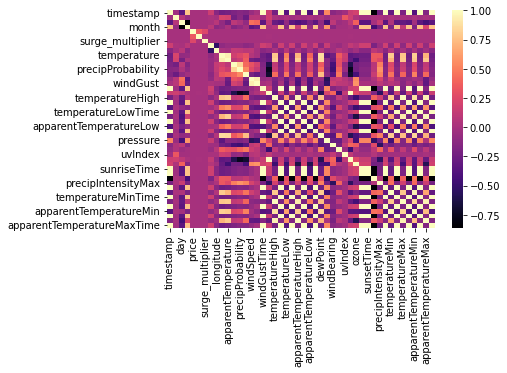

In [ ]:
sns.heatmap(data.corr(), cmap = 'magma')

Ini adalah korelasi dari semua fitur dari dataset. Hasilnya bervariasi dan kita tidak dapat melihatnya dengan jelas. Mari kita periksa korelasi masing-masing fitur berdasarkan fitur harga.

In [ ]:
corr = data.corr()
print(corr['price'].sort_values(ascending=False), '\n')

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
windGust                       0.001218
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760
sunriseTime                    0.000760
temperatureHighTime            0.000759
temperatureLowTime             0.000754
apparentTemperatureMaxTime     0.000746


Fitur yang paling berkorelasi dari semua fitur adalah **distance** dan **surge multiplier**. Cukup jelas karena kedua fitur tersebut mempengaruhi nilai **price**.

<AxesSubplot:>

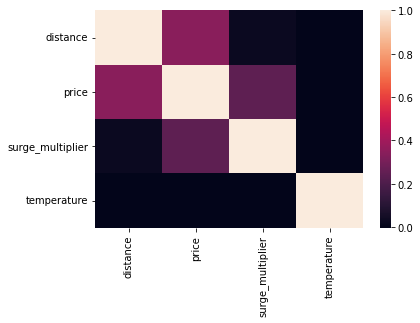

In [ ]:
data_corr = data[['distance','price','surge_multiplier','temperature']]
sns.heatmap(data_corr.corr())

Dari grafik korelasi tersebut dapat disimpulkan bahwa:

- **Distance** dan **surge multiplier** tidak berkorelasi
- **Price** dan **surge multiplier** berkorelasi lemah
- **Price** dan **distance** berkorelasi

In [ ]:
data['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

### Check Outlier

In [ ]:
num = data._get_numeric_data()
num

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.0330,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.0330,43.58,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.0330,38.33,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.0330,34.38,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.0330,37.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,13.0,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,9.5,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,NaN,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,27.0,1.00,1.0,42.3519,-71.0643,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
for i, j in num.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        perc = np.shape(j_col)[0] * 100.0 / np.shape(num)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))

Column timestamp outliers = 0.00%
Column hour outliers = 0.00%
Column day outliers = 0.00%
Column month outliers = 0.00%
Column price outliers = 0.81%
Column distance outliers = 1.27%
Column surge_multiplier outliers = 100.00%
Column latitude outliers = 12.78%
Column longitude outliers = 0.00%
Column temperature outliers = 5.29%
Column apparentTemperature outliers = 7.72%
Column precipIntensity outliers = 100.00%
Column precipProbability outliers = 100.00%
Column humidity outliers = 0.00%
Column windSpeed outliers = 0.00%
Column windGust outliers = 2.43%
Column windGustTime outliers = 0.00%
Column visibility outliers = 19.74%
Column temperatureHigh outliers = 23.65%
Column temperatureHighTime outliers = 0.00%
Column temperatureLow outliers = 0.00%
Column temperatureLowTime outliers = 0.00%
Column apparentTemperatureHigh outliers = 10.33%
Column apparentTemperatureHighTime outliers = 0.00%
Column apparentTemperatureLow outliers = 12.65%
Column apparentTemperatureLowTime outliers = 0.00%

## Data Preprocessing
---

Pada bagian ini, akan dilakukan beberapa proses, yaitu:

- Split Data
- Handling Outliers
- Feature Encoding
- Fetaure Scaling


Pertama akan di drop missing value yang ada, karena missing values ada dalam data target, maka kita bisa mendrop seluruh data yang memiliki missing values.

In [ ]:
data = data.dropna()

### Split Data
---

Dataset akan di Split menjadi 80% Data Training dan 20% Data Test.

In [ ]:
x = data.loc[:,['cab_type', 'name','distance', 'surge_multiplier', 'temperature', 'timestamp']]
y = data['price'] # Data Target

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [ ]:
x_train.shape

(510380, 6)

In [ ]:
y_train.shape

(510380,)

### Handling Outliers

#### Handling Outliers Train Data

In [ ]:
num_train = x_train._get_numeric_data()
for i, j in num_train.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        perc = np.shape(j_col)[0] * 100.0 / np.shape(num_train)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))

Column distance outliers = 1.08%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.28%
Column timestamp outliers = 0.00%


#### Check Distribution for Train Data

In [ ]:
# Fungsi untuk membuat histogram, plot Q-Q dan boxplot.
# Fungsi ini menggunakan kerangka data (data) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(x_train, variable):
    # Tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

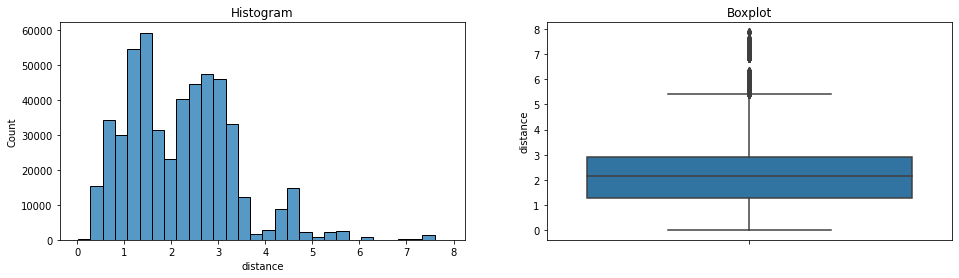


Skewness Value :  0.8170764867230118


In [ ]:
diagnostic_plots(x_train, 'distance')
print('\nSkewness Value : ', x_train['distance'].skew())

Feature `distance` kemungkinan berdistribusi normal

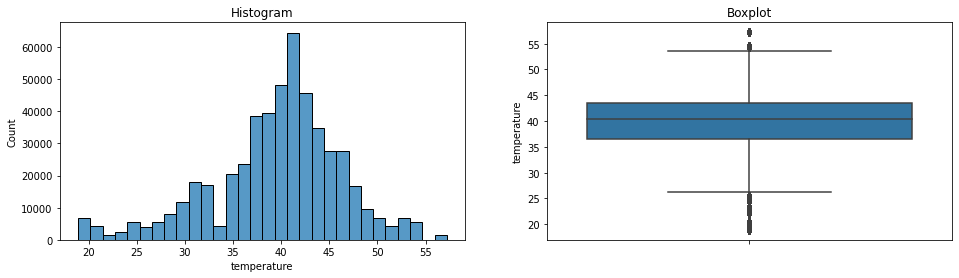


Skewness Value :  -0.609135459279012


In [ ]:
diagnostic_plots(x_train, 'temperature')
print('\nSkewness Value : ', x_train['temperature'].skew())

Feature `temperature` juga memiliki normal distribution

In [ ]:
x_train[['distance','temperature']].describe()

,distance,temperature
count,510380.000000,510380.000000
mean,2.188187,39.583823
std,1.135656,6.723708
min,0.020000,18.910000
25%,1.270000,36.450000
50%,2.160000,40.490000
75%,2.930000,43.580000
max,7.860000,57.220000


#### Capping for Train  Data

In [ ]:
windsoriser = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both', 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_train)

x_train = windsoriser.transform(x_train)

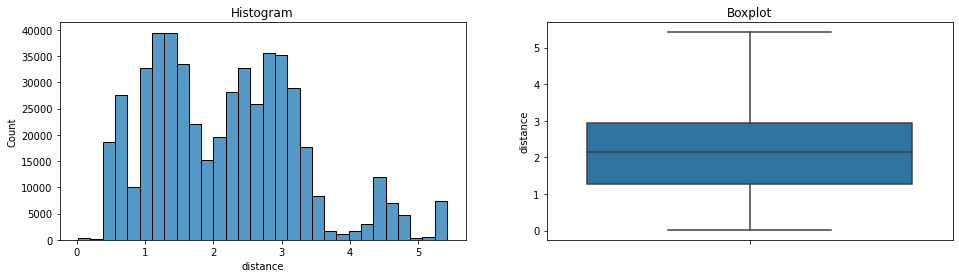


Skewness Value :  0.5895754185688913


In [ ]:
diagnostic_plots(x_train, 'distance')
print('\nSkewness Value : ', x_train['distance'].skew())

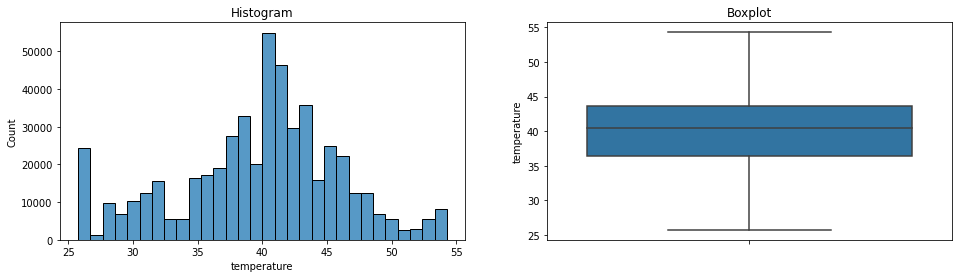


Skewness Value :  -0.318663393786653


In [ ]:
diagnostic_plots(x_train, 'temperature')
print('\nSkewness Value : ', x_train['temperature'].skew())

#### Handling Outliers for Test Data

In [ ]:
num_test = x_test._get_numeric_data()
for i, j in num_test.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        perc = np.shape(j_col)[0] * 100.0 / np.shape(num_test)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))

Column distance outliers = 1.07%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.32%
Column timestamp outliers = 0.00%


#### Distribution for Test Data

In [ ]:
def diagnostic_plots(x_test, variable):
    # figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_test[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_test[variable])
    plt.title('Boxplot')

    plt.show()

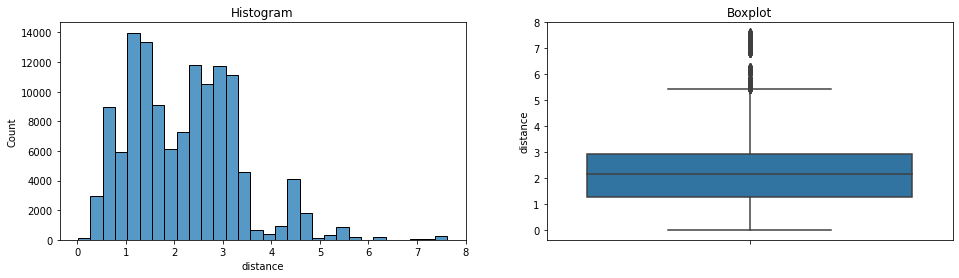


Skewness Value :  0.8159885366032177


In [ ]:
diagnostic_plots(x_test, 'distance')
print('\nSkewness Value : ', x_test['distance'].skew())

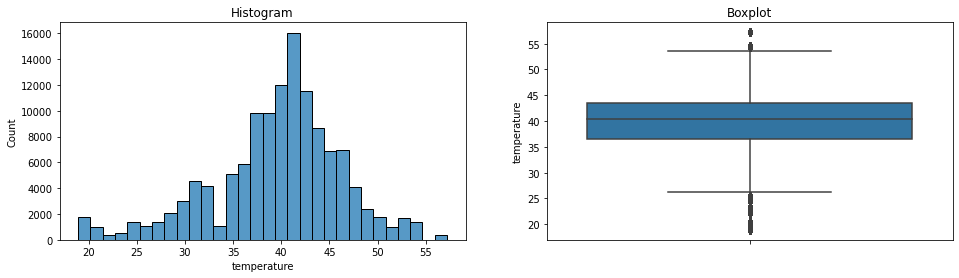


Skewness Value :  -0.6094112157935422


In [ ]:
diagnostic_plots(x_test, 'temperature')
print('\nSkewness Value : ', x_test['temperature'].skew())

#### Capping for Test Data

In [ ]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_test)

x_test = windsoriser.transform(x_test)

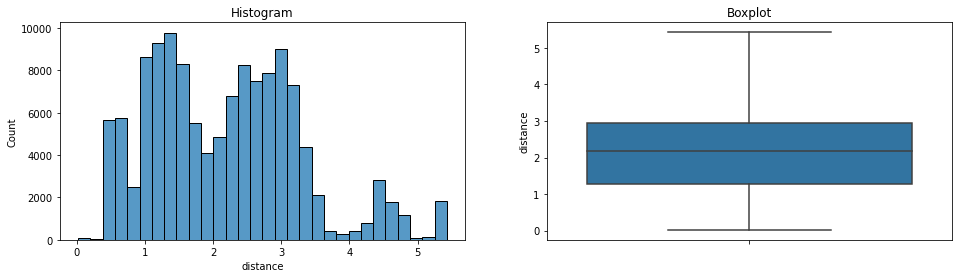


Skewness Value :  0.5848528592114998


In [ ]:
diagnostic_plots(x_test, 'distance')
print('\nSkewness Value : ', x_test['distance'].skew())

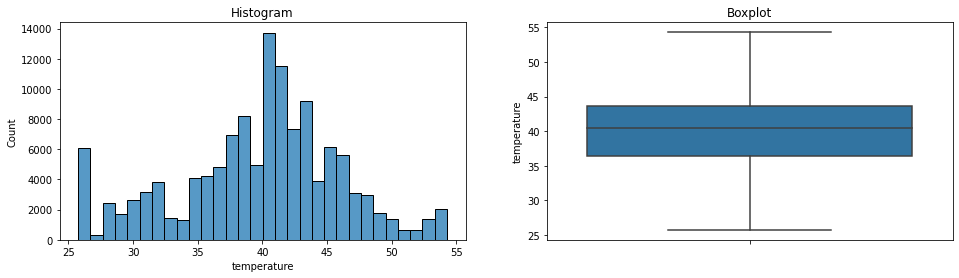


Skewness Value :  -0.3155406719604194


In [ ]:
diagnostic_plots(x_test, 'temperature')
print('\nSkewness Value : ', x_test['temperature'].skew())

### Handling Missing Values
---


In [ ]:
y_train.isnull().sum()

0

In [ ]:
missing_train = y_train.isnull().index[y_train.isnull()]
missing_test = y_train.isnull().index[y_train.isnull()]

drop_x_train = x_train.drop(missing_train.tolist())
drop_x_train

,cab_type,name,distance,surge_multiplier,temperature,timestamp
613406,Uber,WAV,1.90,1.0,44.29,1.543308e+09
594265,Lyft,Shared,1.32,1.0,43.57,1.543295e+09
486324,Uber,UberX,2.38,1.0,46.23,1.543319e+09
452986,Lyft,Lux,1.01,1.0,40.29,1.543497e+09
234459,Uber,Black,1.03,1.0,40.01,1.543683e+09
...,...,...,...,...,...,...
403282,Uber,Black SUV,5.42,1.0,36.95,1.543725e+09
533613,Uber,UberXL,1.50,1.0,31.98,1.544738e+09
511529,Uber,UberPool,1.26,1.0,35.19,1.545052e+09
534152,Lyft,Lyft,1.70,1.0,31.74,1.543561e+09


### Feature Encoding
---

Penggunaan One Hot Encoding (OHE) dengan menerapkan get_dummies untuk train data dan test data

In [ ]:
x_train = pd.get_dummies(x_train, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])
x_test = pd.get_dummies(x_test, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])

### Feature Scaling
---
Penggunaan MinMaxScaler untuk proses scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Modeling 
---

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.9279569604945462

## Model Evaluation
---


In [ ]:
model.coef_

array([ 1.55458426e+01,  3.65647122e+01, -4.36512059e-03,  2.54971813e-03,
       -1.05849483e+12, -6.90421682e+11, -1.28160286e+10, -1.28160286e+10,
        3.55257119e+11,  3.55257119e+11,  3.55257119e+11,  3.55257119e+11,
        3.55257119e+11,  3.55257119e+11, -1.28160287e+10, -1.28160286e+10,
       -1.28160286e+10, -1.28160286e+10])

In [ ]:
prediction_train = model.predict(x_train)
prediction_train

array([ 8.9831543 ,  3.5255127 , 10.35705566, ...,  6.13012695,
        7.51269531, 18.61621094])

In [ ]:
prediction_test = model.predict(x_test)
prediction_test

array([14.52600098,  9.09472656,  7.99829102, ..., 18.98413086,
       25.59313965, 16.28295898])

In [ ]:
# Prediksi dari x_train
from sklearn import metrics
print('MAE Train :'," ", metrics.mean_absolute_error(y_train,prediction_train))
print('MSE Train :'," ", metrics.mean_squared_error(y_train,prediction_train))
print('RMAE Train :'," ", np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))
print('MAPE Train :'," ", metrics.mean_absolute_percentage_error(y_train,prediction_train)*100) # Lower the MAPE, better fit is the model.
print('R2 Score Train :'," ", metrics.r2_score(y_train,prediction_train))

MAE Train :   1.7822905248180585
MSE Train :   6.310576070679174
RMAE Train :   2.5120859998573244
MAPE Train :   13.642841193227609
R2 Score Train :   0.9275199495299079


In [ ]:
# Prediksi dari x_test
print('MAE Test :'," ", metrics.mean_absolute_error(y_test,prediction_test))
print('MSE Test :'," ", metrics.mean_squared_error(y_test,prediction_test))
print('RMAE Test :'," ", np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))
print('MAPE Test :'," ", metrics.mean_absolute_percentage_error(y_test,prediction_test)*100) # Lower the MAPE, better fit is the model.
print('R2 Score Test :'," ", metrics.r2_score(y_test,prediction_test))

MAE Test :   1.7794050091527287
MSE Test :   6.228265928556182
RMAE Test :   2.495649400167456
MAPE Test :   13.606735802078191
R2 Score Test :   0.9279569604945462


Dari data diatas bisa dinyatakan bahwa nilai MAE, MSE dan RMAE memiliki nilai yang kecil. Semakin nilai ketiganya mendekati 0 maka model bisa dikatana semakin baik. 
Sedangkan untuk nilai MAPE menyatakan persentase akurasi dari model. Semakin kecil nilai persentase MAPE maka semakin baik model memprediksi nilai.

R2 score menunjukkan proporsi titik data yang terletak di dalam garis yang dibuat oleh persamaan regresi. Nilai R2  score yang lebih tinggi diinginkan karena menunjukkan hasil yang lebih baik.



## Model Inference
---
Dalam model inference, akan digunakan data baru untuk mengetahui kualitas dari model Machine Learning. Data yang akan digunakan adalah data acak.

In [ ]:
from sklearn.utils import shuffle
data_acak = shuffle(data)
data_acak

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
284552,a3923b39-2119-43a1-a5e9-c209aa8bc394,1.543591e+09,15,30,11,2018-11-30 15:18:03,America/New_York,Theatre District,Northeastern University,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
156316,a72dabd6-4b5c-4ef0-b54f-e6bb4612033d,1.543453e+09,0,29,11,2018-11-29 00:51:46,America/New_York,North End,Theatre District,Lyft,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
173630,36bc2f83-86d5-4420-8f90-585ef8309bc2,1.543604e+09,18,30,11,2018-11-30 18:53:00,America/New_York,West End,Haymarket Square,Lyft,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
15757,fa5fc27c-eb16-4301-83e1-6a094a07f718,1.545021e+09,4,17,12,2018-12-17 04:30:09,America/New_York,Beacon Hill,Fenway,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
549339,a89e6b01-8cc9-4fbf-b9f7-0f61a135e0df,1.543542e+09,1,30,11,2018-11-30 01:38:02,America/New_York,Beacon Hill,North End,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398135,476e1d4b-3da4-4ba9-9b5d-d69023dce441,1.544675e+09,4,13,12,2018-12-13 04:20:00,America/New_York,Beacon Hill,Haymarket Square,Uber,...,0.0000,1544634000,22.55,1544673600,37.84,1544637600,17.99,1544673600,30.27,1544637600
199716,beded059-7bdb-4c60-8fcb-a898e9b4a6c6,1.543708e+09,23,1,12,2018-12-01 23:43:00,America/New_York,Beacon Hill,Fenway,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
351019,715f2b7e-2171-44af-abc8-99d9fa95cb46,1.545005e+09,0,17,12,2018-12-17 00:05:11,America/New_York,North Station,South Station,Uber,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
39504,cc10934a-640a-477f-9dfd-1809bbd10159,1.543790e+09,22,2,12,2018-12-02 22:33:01,America/New_York,Fenway,North Station,Uber,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000


## Feature Selection


In [ ]:
x_inference = data_acak.loc[:, ['hour','day','month','cab_type','name','distance','surge_multiplier','temperature', 'humidity']]
y_inference = data_acak['price'].values

In [ ]:
y_inference.shape

(637976,)

In [ ]:
x_inference.shape

(637976, 9)

## Handling Outliers
---

In [ ]:
num_inference = x_inference._get_numeric_data()
for i, j in num_inference.items():
  q1 = j.quantile(0.25)
  q3 = j.quantile(0.75)
  iqr = q3 - q1
  j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
  perc = np.shape(j_col)[0] * 100.0 / np.shape(num_inference)[0]
  print("Column %s outliers = %.2f%%" % (i, perc))

Column hour outliers = 0.00%
Column day outliers = 0.00%
Column month outliers = 0.00%
Column distance outliers = 1.09%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.29%
Column humidity outliers = 0.00%


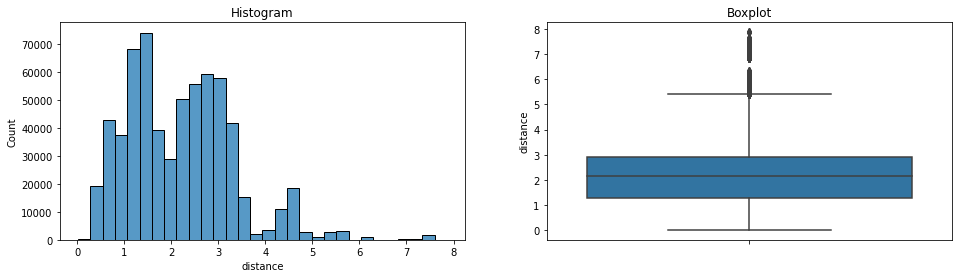


Skewness Value :  0.8168484903389336


In [ ]:
diagnostic_plots(x_inference, 'distance')
print('\nSkewness Value : ', x_inference['distance'].skew())

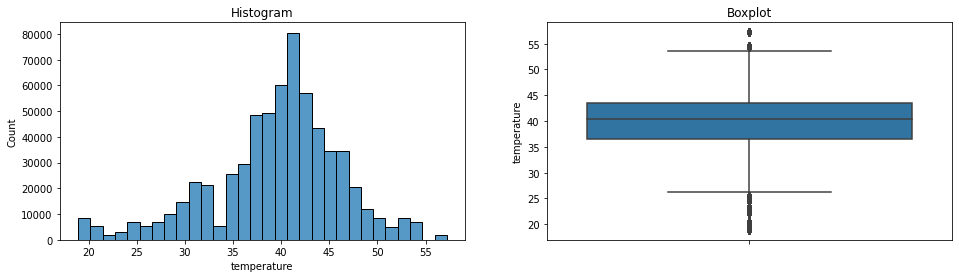


Skewness Value :  -0.609190796402858


In [ ]:
diagnostic_plots(x_inference, 'temperature')
print('\nSkewness Value : ', x_inference['temperature'].skew())

In [ ]:
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_inference)

x_inference = windsoriser.transform(x_inference)

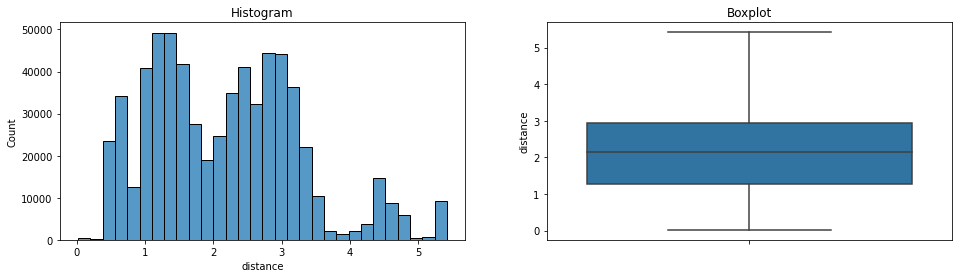


Skewness Value :  0.5882789550279044


In [ ]:
diagnostic_plots(x_inference, 'distance')
print('\nSkewness Value : ', x_inference['distance'].skew())

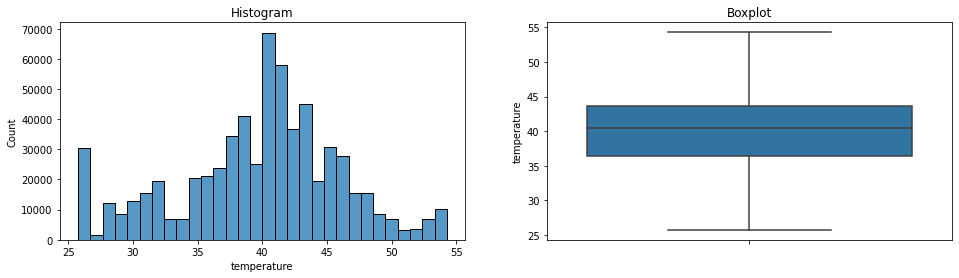


Skewness Value :  -0.3180377348916173


In [ ]:
diagnostic_plots(x_inference, 'temperature')
print('\nSkewness Value : ', x_inference['temperature'].skew())

## Feature Encoding

In [ ]:
x_inference = pd.get_dummies(x_inference, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])

## Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_inference)
x_inf = scaler.transform(x_inference)

## Modeling

In [ ]:
model = LinearRegression()
model.fit(x_inference, y_inference)

LinearRegression()

## Prediction

In [ ]:
y_predict_linear = model.predict(x_inference)
y_predict_linear

array([31.47607422,  4.04345703, 27.53393555, ...,  9.75244141,
       11.34082031, 18.29711914])

Ini adalah prediksi data target yang merupakan `price` menggunakan model yang dibuat.

## Conclusion

Dari Uber dan Lyft Dataset, menggunakan regresi linier dengan `cab type`, `name`, `distance`, `surge multiplier`, `temperature`, `timestamp` sebagai fitur dan `price` sebagai target menghasilkan R2 Score sebesar 0.92 dari train & test data.


R2 score menunjukkan proporsi titik data yang terletak di dalam garis yang dibuat oleh persamaan regresi. Nilai R2  score yang lebih tinggi diinginkan karena menunjukkan hasil yang lebih baik.

Dari data diatas bisa dinyatakan bahwa nilai MAE, MSE dan RMAE memiliki nilai yang kecil. Semakin nilai ketiganya mendekati 0 maka model bisa dikatana semakin baik.

Sedangkan untuk nilai MAPE menyatakan persentase akurasi dari model. Semakin kecil nilai persentase MAPE maka semakin baik model memprediksi nilai.

Berikut nilai yang dihasilkan:

- MAE Train :   1.7822905248180585
- MSE Train :   6.310576070679174
- RMAE Train :   2.5120859998573244
- MAPE Train :   13.642841193227609
- R2 Score Train :   0.9275199495299079
---
- MAE Test :   1.7794050091527287
- MSE Test :   6.228265928556182
- RMAE Test :   2.495649400167456
- MAPE Test :   13.606735802078191
- R2 Score Test :   0.9279569604945462_

Berdasarkam nilai nilai diatas, dapat disimpulkan bahwa model yang dibuat sudah baik.

---